In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os
import numpy as np
def load_results(area, methods):
    log_path = "../log/imputation/{}".format(area)
    all_maes = []
    all_mses = []
    for method in methods:
        path = os.path.join(log_path, method)
        subdir = os.listdir(path)
        subdir = [x for x in subdir if x.endswith('.log') and "missing" in x]
        index = [int(x[-5]) for x in subdir]
        subdir = [subdir[i] for i in np.argsort(index)]
        mae = []
        mse = []
        for i in range(9):
            with open(os.path.join(path, subdir[i]), 'rb') as f:
                print(os.path.join(path, subdir[i]))
                lines = f.readlines()
                mae.append(float(lines[1][42:47]))
                mse.append(float(lines[1][-7:-1]))
        all_maes.append(mae)
        all_mses.append(mse)
    return np.array(all_maes), np.array(all_mses)

In [10]:
def plot_radar_chart(data, methods, title, metrics):
    N = len(metrics)
    theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
    theta = np.concatenate([theta, [theta[0]]])
    
    fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={"projection": "polar"})
    
    ax.set_title(title, y=-0.1, fontsize=34)
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.set_rlabel_position(90)
    
    ax.spines["polar"].set_zorder(1)
    ax.spines["polar"].set_color("lightgrey")
    
    # color_palette = ["#A51C36", "#7ABBDB",  "#84BA42", "#682487", "#D4562E", "#4485C7","#DBB428", "#6F6F6F", "#4DB748"]
    color_palette = ["#FF0000", "#8C564B",  "#2CA02C", "#FFCC00", "#1F77B4", "#9467BD","#FF7F0E", "#E377C2", "#330000"]

    

    for i in range(data.shape[0]):
        values = data[i]
        values = np.concatenate([values, values[0][np.newaxis]], 0)
        ax.plot(theta, values, linewidth=4, linestyle="solid", label=methods[i], marker='o', markersize=10,color=color_palette[i%len(color_palette)])
        ax.fill(theta, values, alpha=0.05, color=color_palette[i % len(color_palette)])
        
    
    plt.xticks(theta[:-1], metrics, color="black", size=32)
    # plt.yscale("log")
    ax.set_yscale("log")
    ax.yaxis.set_inverted(True)
    ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3f'))
    a=np.max(data)
    b=np.min(data)
    c=10**((np.log10(a) + np.log10(b))/2)
    plt.yticks([a,c,b], color="black", size=24)
    

    
    return fig

PRE

../log/imputation/PRE/STIMP/20250417_215233_missing_0.1.log
../log/imputation/PRE/STIMP/20250418_160651_missing_0.2.log
../log/imputation/PRE/STIMP/20250419_053632_missing_0.3.log
../log/imputation/PRE/STIMP/20250419_195635_missing_0.4.log
../log/imputation/PRE/STIMP/20250420_102311_missing_0.5.log
../log/imputation/PRE/STIMP/20250421_014958_missing_0.6.log
../log/imputation/PRE/STIMP/20250421_153319_missing_0.7.log
../log/imputation/PRE/STIMP/20250422_034012_missing_0.8.log
../log/imputation/PRE/STIMP/20250422_144237_missing_0.9.log
../log/imputation/PRE/DINEOF_per_timestep/20250430_202211_missing_0.1.log
../log/imputation/PRE/DINEOF_per_timestep/20250430_211814_missing_0.2.log
../log/imputation/PRE/DINEOF_per_timestep/20250430_221324_missing_0.3.log
../log/imputation/PRE/DINEOF_per_timestep/20250430_231704_missing_0.4.log
../log/imputation/PRE/DINEOF_per_timestep/20250501_001933_missing_0.5.log
../log/imputation/PRE/DINEOF_per_timestep/20250501_011105_missing_0.6.log
../log/imputatio

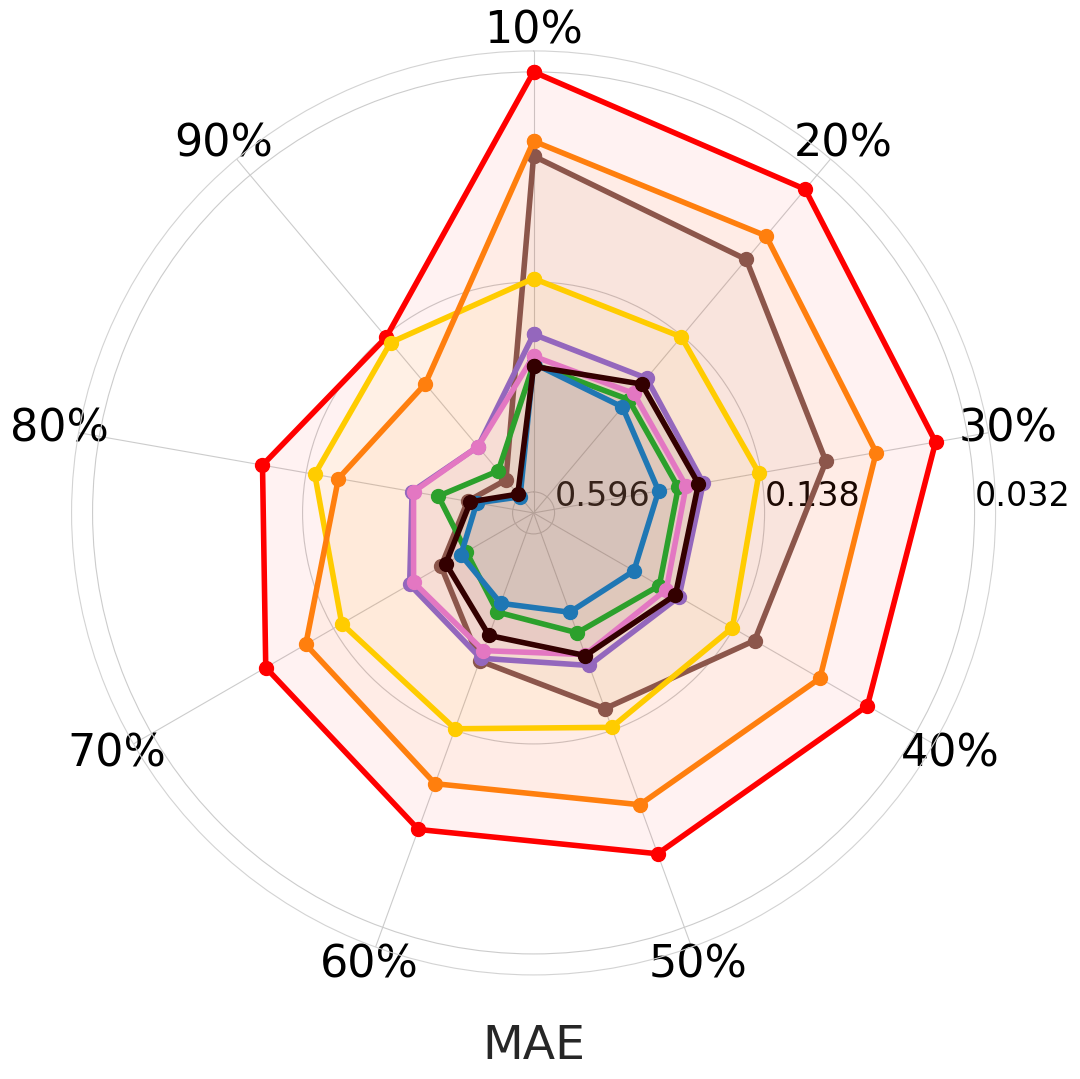

[0.44347826 0.47169811 0.5395189  0.59640103 0.65883807 0.71348071
 0.75586711 0.76537217 0.72668622]
[0.38223938 0.34532374 0.34313725 0.3173913  0.30478589 0.28771552
 0.27511312 0.30905378 0.04638472]


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import requests
sns.set_style("white")

mae, mse = load_results("PRE",["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])
methods = ["STIMP", "DINEOF", "CSDI",  "ImputeFormer", "Inpainter", "Lin-ITP", "MAE", "Slide Window", "TRMF"]
metrics = ["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"]

# Plot 
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()

mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

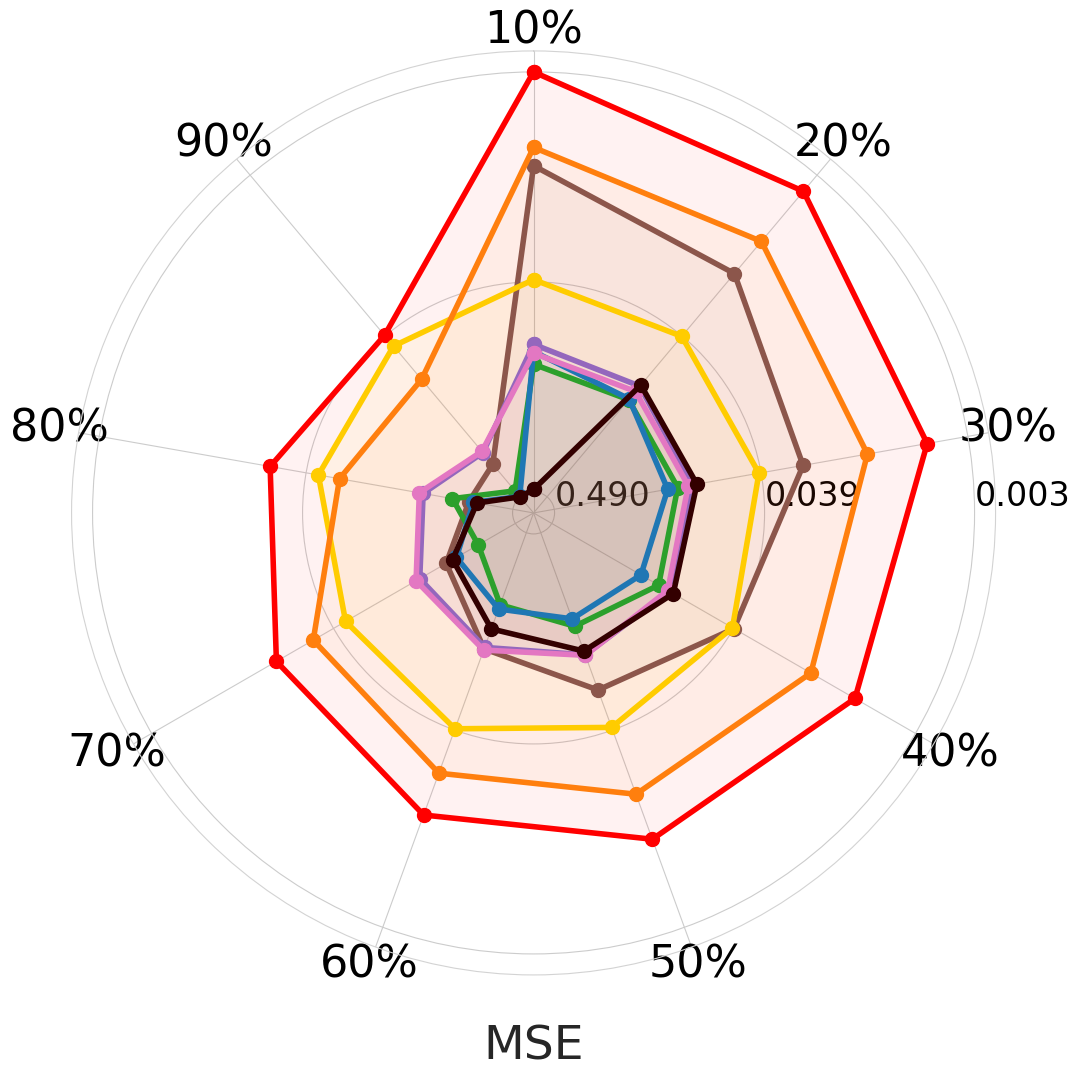

In [12]:
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

MEXICO

In [13]:
mae, mse = load_results("MEXICO", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log/imputation/MEXICO/STIMP/20250425_142627_missing_0.1.log
../log/imputation/MEXICO/STIMP/20250425_142627_missing_0.2.log
../log/imputation/MEXICO/STIMP/20250426_070939_missing_0.3.log
../log/imputation/MEXICO/STIMP/20250425_075105_missing_0.4.log
../log/imputation/MEXICO/STIMP/20250425_200702_missing_0.5.log
../log/imputation/MEXICO/STIMP/20250426_090745_missing_0.6.log
../log/imputation/MEXICO/STIMP/20250425_090733_missing_0.7.log
../log/imputation/MEXICO/STIMP/20250425_090733_missing_0.8.log
../log/imputation/MEXICO/STIMP/20250425_202146_missing_0.9.log
../log/imputation/MEXICO/DINEOF_per_timestep/20250430_203850_missing_0.1.log
../log/imputation/MEXICO/DINEOF_per_timestep/20250430_213444_missing_0.2.log
../log/imputation/MEXICO/DINEOF_per_timestep/20250430_222952_missing_0.3.log
../log/imputation/MEXICO/DINEOF_per_timestep/20250430_233321_missing_0.4.log
../log/imputation/MEXICO/DINEOF_per_timestep/20250501_003534_missing_0.5.log
../log/imputation/MEXICO/DINEOF_per_timestep/202

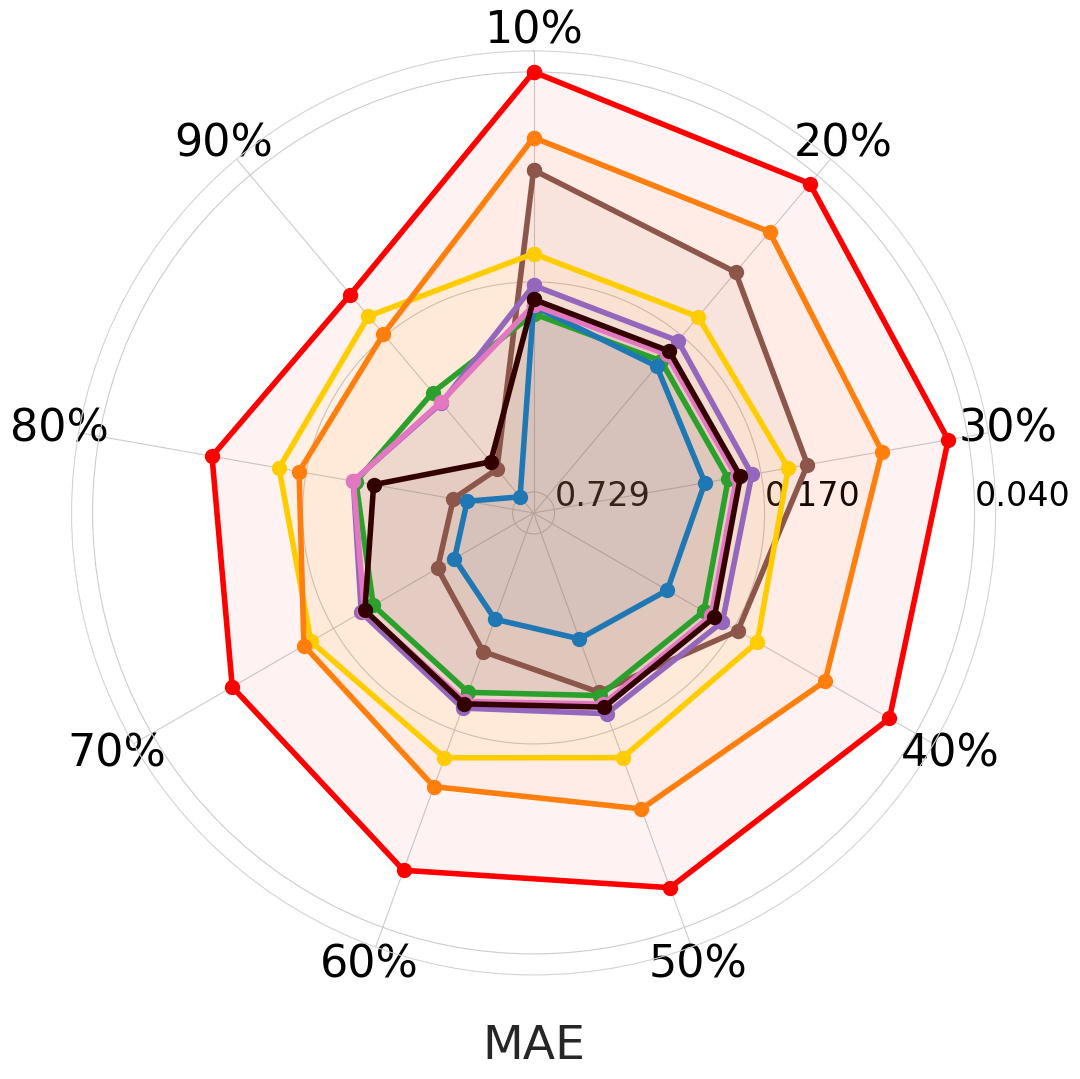

[0.49299363 0.55067921 0.62815297 0.70248937 0.76311111 0.80039526
 0.80628674 0.81664581 0.79380173]
[0.36523126 0.35240964 0.37225275 0.40243902 0.44012605 0.45989305
 0.4360119  0.37571023 0.17766854]


In [14]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

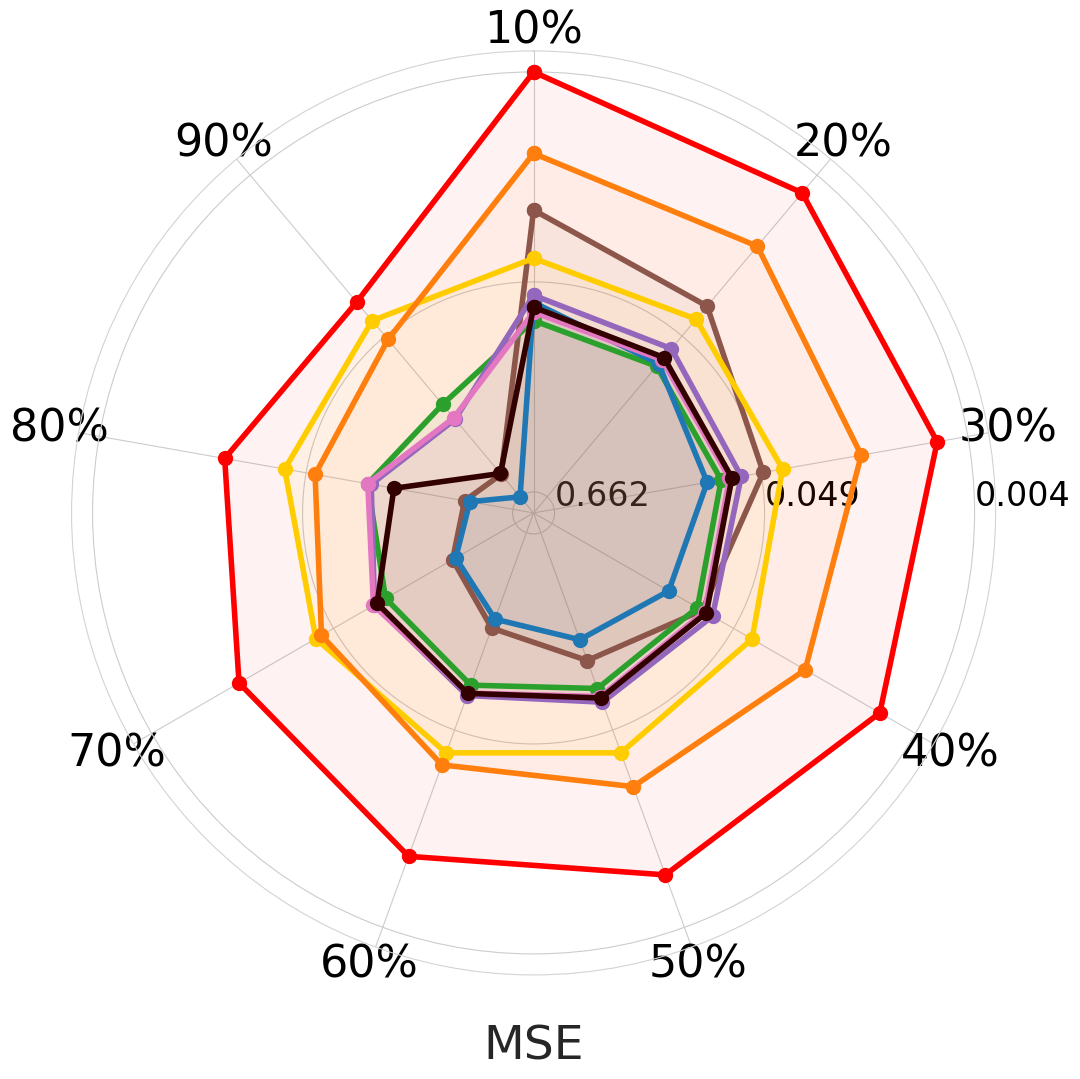

In [15]:
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

Chesapeake

In [16]:
mae, mse = load_results("Chesapeake", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log/imputation/Chesapeake/STIMP/20250417_215227_missing_0.1.log
../log/imputation/Chesapeake/STIMP/20250418_160649_missing_0.2.log
../log/imputation/Chesapeake/STIMP/20250418_215831_missing_0.3.log
../log/imputation/Chesapeake/STIMP/20250419_060104_missing_0.4.log
../log/imputation/Chesapeake/STIMP/20250419_141645_missing_0.5.log
../log/imputation/Chesapeake/STIMP/20250419_220825_missing_0.6.log
../log/imputation/Chesapeake/STIMP/20250420_063501_missing_0.7.log
../log/imputation/Chesapeake/STIMP/20250420_141309_missing_0.8.log
../log/imputation/Chesapeake/STIMP/20250420_215306_missing_0.9.log
../log/imputation/Chesapeake/DINEOF_per_timestep/20250430_205722_missing_0.1.log
../log/imputation/Chesapeake/DINEOF_per_timestep/20250430_215254_missing_0.2.log
../log/imputation/Chesapeake/DINEOF_per_timestep/20250430_224743_missing_0.3.log
../log/imputation/Chesapeake/DINEOF_per_timestep/20250430_235044_missing_0.4.log
../log/imputation/Chesapeake/DINEOF_per_timestep/20250501_005211_missing_

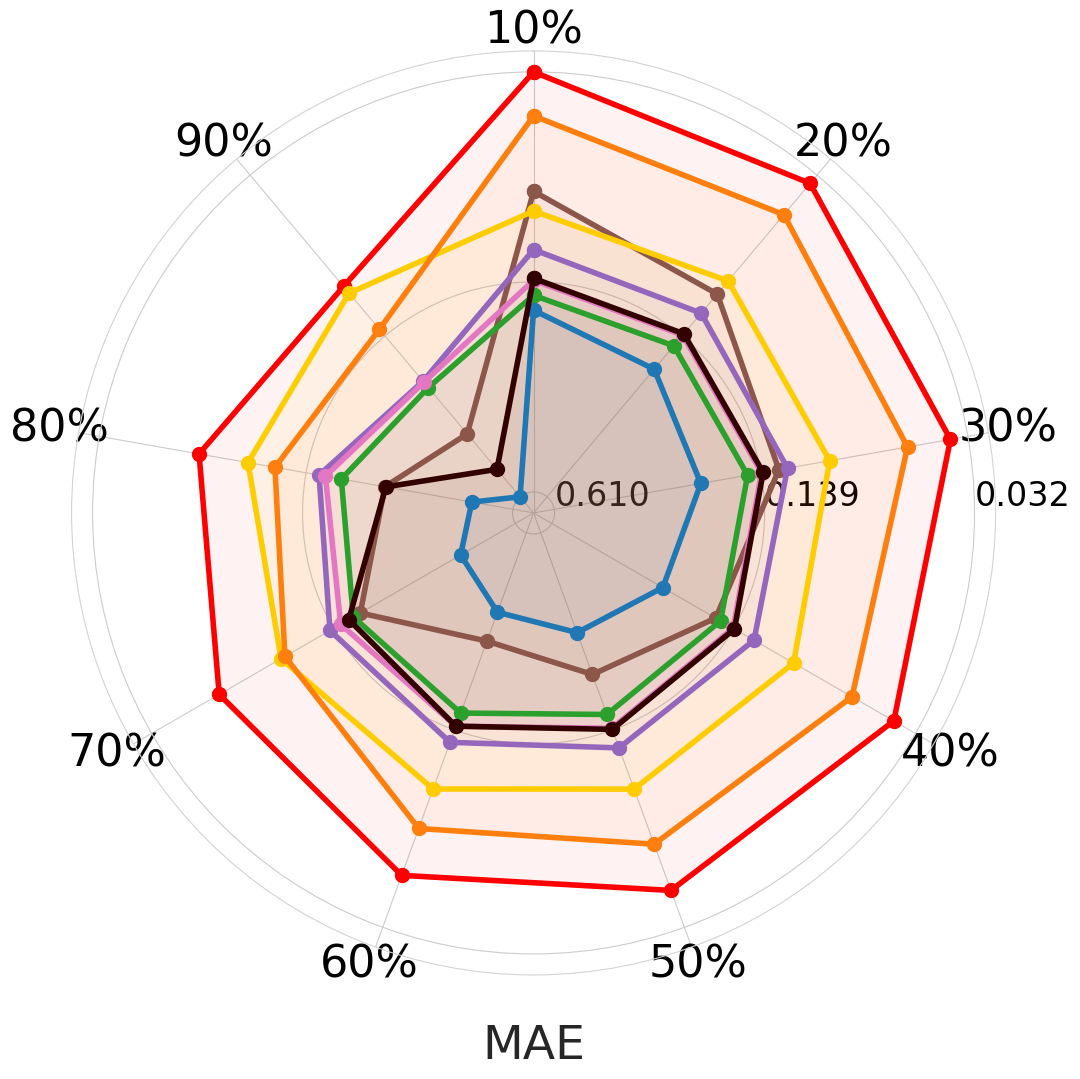

[0.56870748 0.6384778  0.70669935 0.76507147 0.80170778 0.82711489
 0.68247542 0.73516169 0.74218065]
[0.2662037  0.25       0.26434426 0.28813559 0.2927242  0.2962406
 0.39537445 0.29520697 0.05970149]


In [18]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

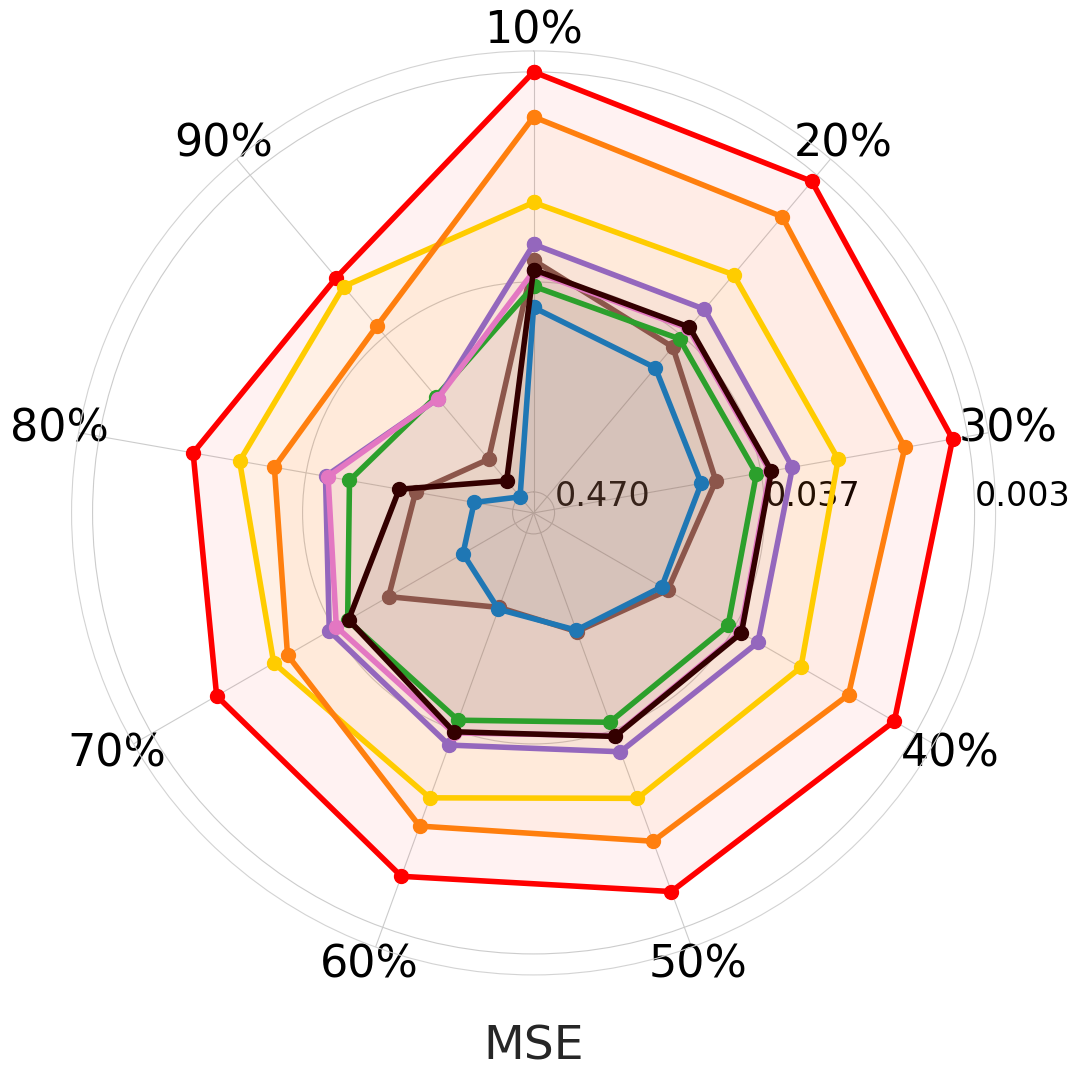

In [19]:
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()

Yangtze

In [20]:
mae, mse = load_results("Yangtze", ["STIMP", "DINEOF_per_timestep", "CSDI",  "ImputeFormer", "Inpainter", "Lin-Itp", "MAE", "Slide_Window", "TRMF"])

../log/imputation/Yangtze/STIMP/20250417_215251_missing_0.1.log
../log/imputation/Yangtze/STIMP/20250418_160711_missing_0.2.log
../log/imputation/Yangtze/STIMP/20250419_075801_missing_0.3.log
../log/imputation/Yangtze/STIMP/20250420_010123_missing_0.4.log
../log/imputation/Yangtze/STIMP/20250420_190410_missing_0.5.log
../log/imputation/Yangtze/STIMP/20250421_101531_missing_0.6.log
../log/imputation/Yangtze/STIMP/20250422_002054_missing_0.7.log
../log/imputation/Yangtze/STIMP/20250422_134615_missing_0.8.log
../log/imputation/Yangtze/STIMP/20250423_023829_missing_0.9.log
../log/imputation/Yangtze/DINEOF_per_timestep/20250429_000955_missing_0.1.log
../log/imputation/Yangtze/DINEOF_per_timestep/20250429_014156_missing_0.2.log
../log/imputation/Yangtze/DINEOF_per_timestep/20250429_031103_missing_0.3.log
../log/imputation/Yangtze/DINEOF_per_timestep/20250429_043814_missing_0.4.log
../log/imputation/Yangtze/DINEOF_per_timestep/20250429_060722_missing_0.5.log
../log/imputation/Yangtze/DINEOF_p

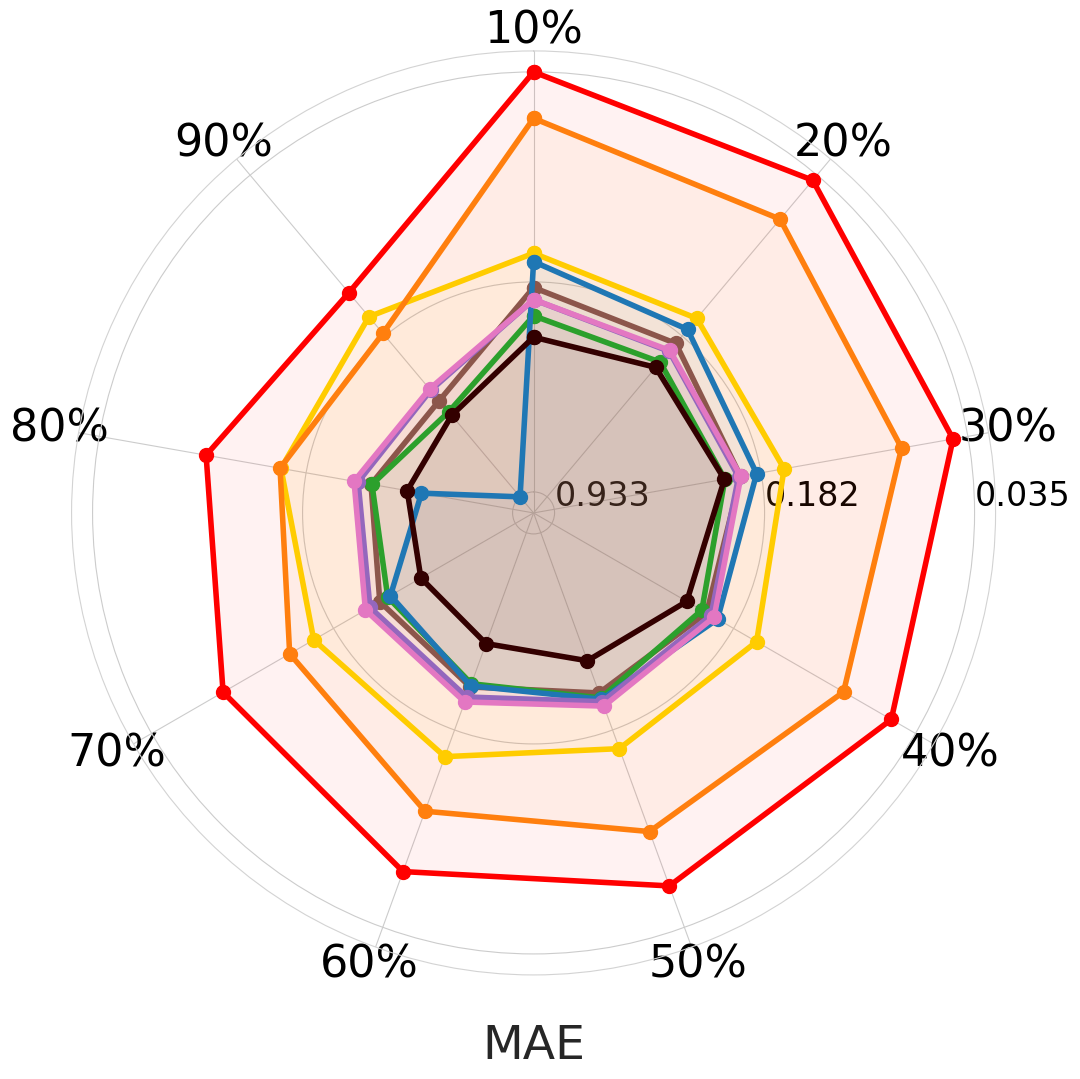

[0.81348788 0.80969388 0.81367041 0.81001727 0.79797571 0.7835131
 0.75571688 0.72867962 0.66590585]
[0.30314961 0.3267148  0.33444816 0.34911243 0.36270754 0.39374326
 0.45061224 0.4428668  0.21619813]


In [21]:
fig = plot_radar_chart(mae, methods, title="MAE", metrics=metrics)
plt.show()
mae = np.array(mae)
print(1-mae[0]/mae[1])
print(1-mae[0]/np.min(mae[2:],axis=0))

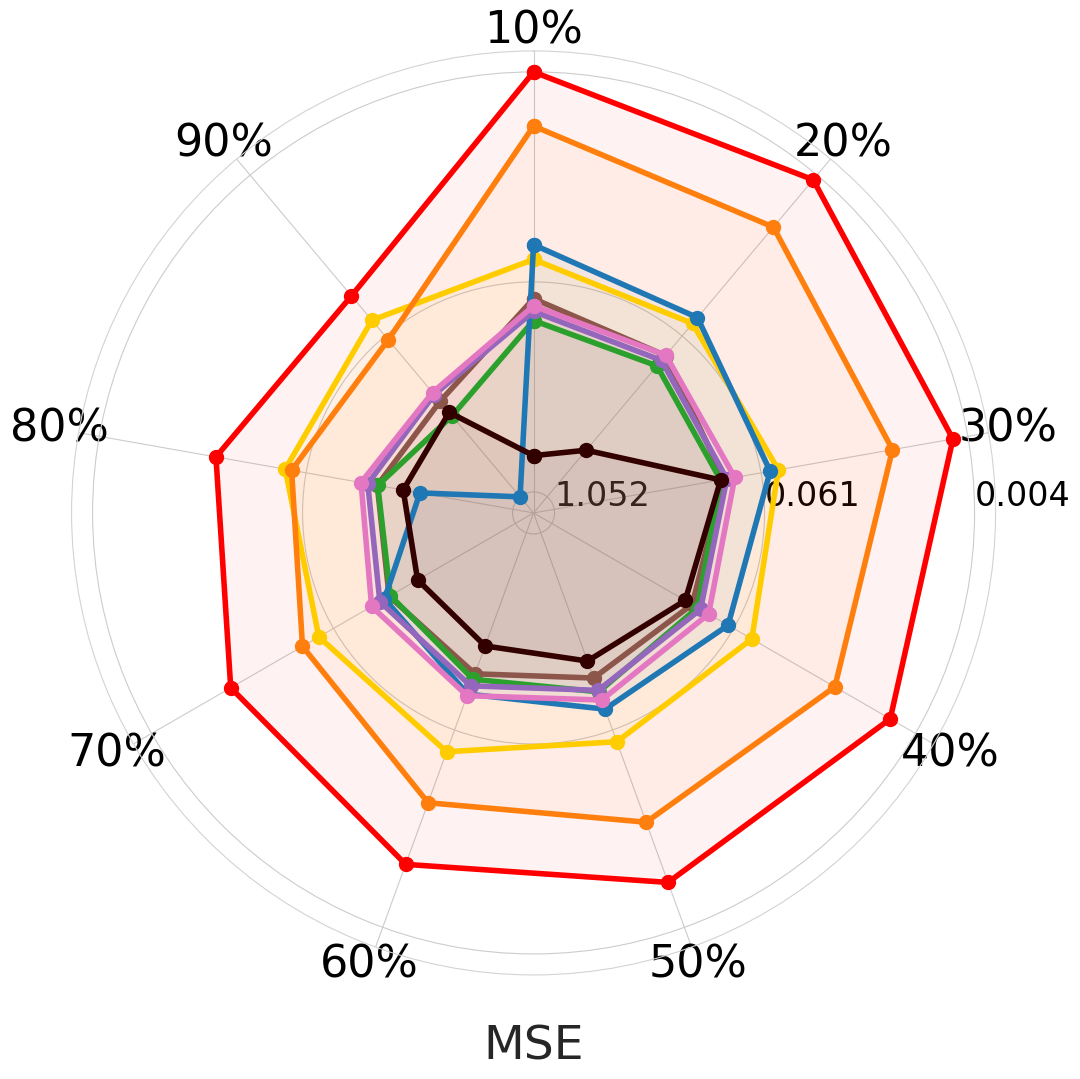

In [22]:
fig = plot_radar_chart(mse, methods, title="MSE", metrics=metrics)
plt.show()